In [9]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

### User Manual
##### General
Once all 8 days are collected, the surface reflectance algorithm applies a set of filters based on quality, cloud, and viewing geometry.
* CloudReplaced with data 8 contaminated pixelsand extreme off-nadirsensor viewsare considered lower quality.
* A cloudfree, nadir view pixel with no residual atmospheric contamination represents the best quality pixel.

Only the higher quality cloud free data are retained forfurther compositing. Additionally, they filter pixels affected by atmospheric contaminants.


In [207]:
def get_detaildQA(number):
    # Classification MODIS
    tpl_QA = ('goodQA', 'regularQA','cloudy','unmade')
    tpl_QA_usefulness = ('highest', 'lower', 'decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9','decreasing10','lowest','useless','faultyL1B','unuseful')
    tpl_QA_aerosol = ('correction','low','intermediate','high')
    tpl_QA_adjacent_cloud = ('no','yes')
    tpl_QA_water = ('shallow ocean','land','shorelines', 'shallow inland water','ephimeral water', 'shallow inland water','ocean', 'ocean')
    tpl_QA_snow = ('no','yes')
    
    QA_general = tpl_QA[0B11 & number]
    QA_usefulness = tpl_QA_usefulness[0B1111 & (number >> 2)]
    QA_aerosol = tpl_QA_aerosol[0B11 & (number >> 6)]
    QA_adjacent_cloud = tpl_QA_adjacent_cloud[0B1 & (number >> 8)]
    QA_water =  tpl_QA_water[0B111 & (number >> 11)]
    QA_snow = tpl_QA_snow[0B1 & (number >> 14)]
    return {'QA_general': QA_general, 'QA_usefulness': QA_usefulness, 'QA_aerosol': QA_aerosol, 'QA_adjacent_cloud': QA_adjacent_cloud, 'QA_water':QA_water, 'QA_snow': QA_snow}

After verifying all of the files, none of them showed presence of snow or ice. Hence, that column was eliminated.

In [210]:
for file in os.listdir('../ndvi_data/earth_engine_export/'):

    df_original = pd.read_csv('../ndvi_data/earth_engine_export/'+file)

    df_original['.geo'] = df_original['.geo'].apply(json.loads)
    df_original['longitude'] = [row[1]['.geo']['coordinates'][0] for row in df_original.iterrows()]
    df_original['latitud'] = [row[1]['.geo']['coordinates'][1] for row in df_original.iterrows()]
    df_original[['QA_general','QA_usefulness','QA_aerosol','QA_adjacent_cloud','QA_water','QA_snow']] = None

    for index, value in enumerate([get_detaildQA(row[1]['DetailedQA']) for row in df_original.iterrows()]):
        df_original.loc[index,['QA_general','QA_usefulness','QA_aerosol','QA_adjacent_cloud','QA_water','QA_snow']] = value

    #df_modified['DetailedQA'] = df_modified['DetailedQA'].apply(bin)
    df_original = df_original.drop(columns = ['.geo','DetailedQA','QA_snow'])
    df_original.to_csv('../ndvi_data/new_columns_data/'+file, index=False)

    #df_modified.head()
print('done')

done


In [8]:
df_all_data = pd.DataFrame()
for file in os.listdir('../ndvi_data/new_columns_data/'):
    df_modified = pd.read_csv('../ndvi_data/new_columns_data/'+file)
    df_all_data = pd.concat([df_all_data,df_modified], ignore_index=True)
df_all_data.to_csv('../ndvi_data/new_columns_data.csv', index=False)


### Exploratory analysis

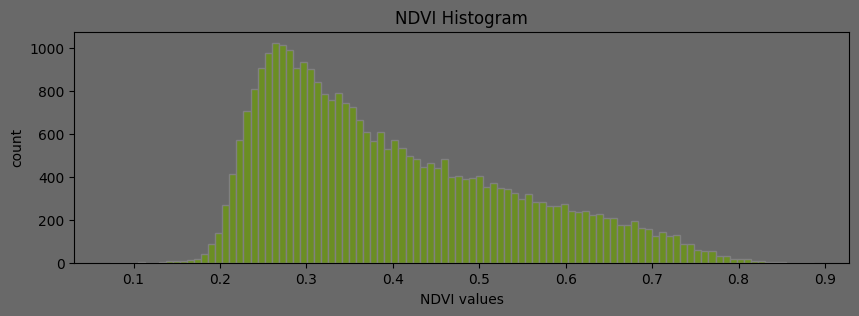

In [29]:
plt.figure(figsize=(10,3), facecolor='dimgrey')
ax = plt.axes()
ax.set_facecolor('dimgrey')

plt.hist(df_all_data.NDVI, bins = 100, color = 'olivedrab', edgecolor='grey')

plt.title('NDVI Histogram')
plt.xlabel('NDVI values', col)
plt.ylabel('count')


plt.show()